# 1.0 Import Libraries

In [ ]:
import pandas as pd
from datetime import datetime
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
plt.style.use("dark_background")

# 2.0 Set Tickers & Parameters

In [ ]:
stock="PETR4.SA"#@param {type: "string"}
inicio="2017-01-01"#@param {type: "date"}
final=datetime.today().strftime("%Y-%m-%d")

# 3.0 Plot Returns

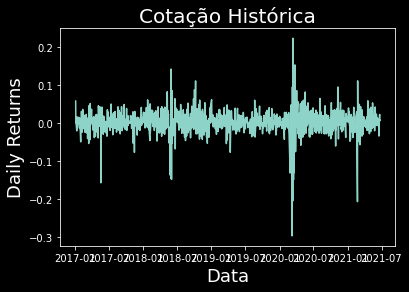

In [ ]:
df=pd.DataFrame()
df=web.DataReader(stock, data_source="yahoo",start=inicio, end=final)
returns=df.pct_change()
# mostrando o gráfico de retornos logaritimicos diarios
title="Cotação Histórica"
plt.plot(returns["Adj Close"])
plt.title(title,fontsize=20)
plt.xlabel("Data", fontsize=18)
plt.ylabel("Daily Returns", fontsize=18)
plt.show()


# 4.0 Log Returns & Root Mean Squared

In [ ]:
# Log Returns
returns["Log Returns"]=np.log(1+returns["Adj Close"])
returns=returns.dropna()
returns["RMS"]=returns["Log Returns"]**2
returns



,High,Low,Open,Close,Volume,Adj Close,Log Returns,RMS
Date,,,,,,,,
2017-01-03,0.064626,0.023973,0.021175,0.057299,4.308184,0.057299,0.055717,0.003104
2017-01-04,0.001917,0.024080,0.033445,0.000000,-0.071996,0.000000,0.000000,0.000000
2017-01-05,0.014668,0.020248,0.016181,0.016129,0.283629,0.016129,0.016000,0.000256
2017-01-06,0.000629,-0.007682,0.005096,-0.005714,-0.462198,-0.005714,-0.005731,0.000033
2017-01-09,-0.020100,-0.010968,-0.017744,-0.021073,0.000274,-0.021073,-0.021298,0.000454
...,...,...,...,...,...,...,...,...
2021-06-17,-0.003073,-0.029892,-0.002407,-0.034660,0.230286,-0.034660,-0.035275,0.001244
2021-06-18,-0.026712,-0.009674,-0.034816,0.006754,0.209796,0.006754,0.006732,0.000045
2021-06-21,0.020408,0.027496,0.014286,0.022246,-0.560006,0.022246,0.022002,0.000484


# 5.0 Statistics

In [ ]:
media=statistics.mean(returns["RMS"])
last_step=math.sqrt(media)


# 6.0 Output Historical Volatility

In [ ]:
# Anualizar
anualizado=last_step*(252/1)**0.5
print(anualizado)
print(f"Historical Volatility: {anualizado*100}%")

0.5050819890252775
Historical Volatility: 50.508198902527745%
